# Demonstrations for the fractals

In [3]:
import fractalPy as frac
import numpy as np

cover image:

In [5]:
m=1.4
x_init = tuple(np.array([-3,3])/m + -0.5)
y_init = tuple(np.array([-1.6875, 1.6875])/m + 0)

Fractal(x_ran=x_init, y_ran=y_init, n_pts=1080, threshold=5000)

Initialising object...
Object initialised.


## Mandelbrot set

To start off... let's plot the Mandelbrot set

Initialising object...
Object initialised.


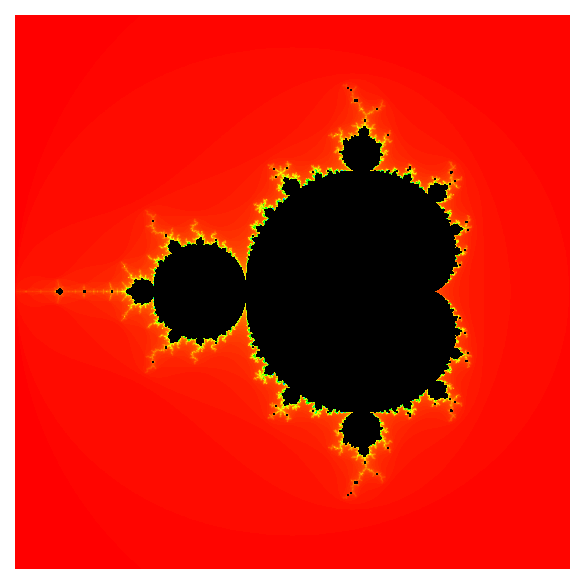

In [2]:
Fractal().plot()

### Zooming into the Mandelbrot set

Let's say we want to set up an iteration to create a video that zooms into a specific location of the Mandelbrot set. The starting and finishing location for this will be of interest to us. We can start off by plotting and configuring what will be our initial frame:

In [2]:
x_init = (-3, 3)
y_init = (-1.6875, 1.6875)

Initialising object...
Object initialised.


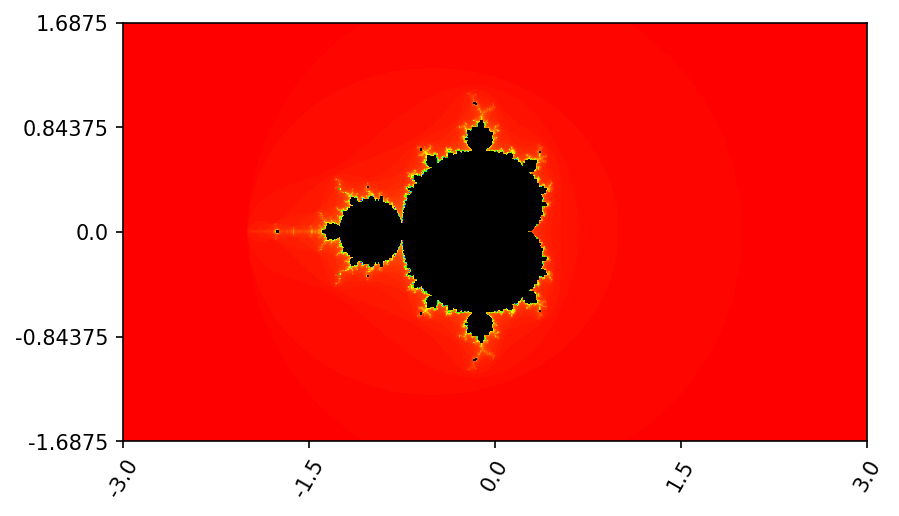

In [3]:
manzoom = Fractal(x_ran=x_init, y_ran=y_init, n_pts=360, threshold=5000)
manzoom.plot(axis='on')

Great! Now we need to choose a target location to zoom into... This is a bit trickier and we may want to explore configurations through plots

first, lets have a look at the target location for the zoom

We might want to do some exploration of the target zoom location first to pick where we would like to zoom towards.

In [6]:
manInit = Fractal(x_ran=x_init, y_ran=y_init)

Initialising object...
Object initialised.


Initialising object...
Object initialised.


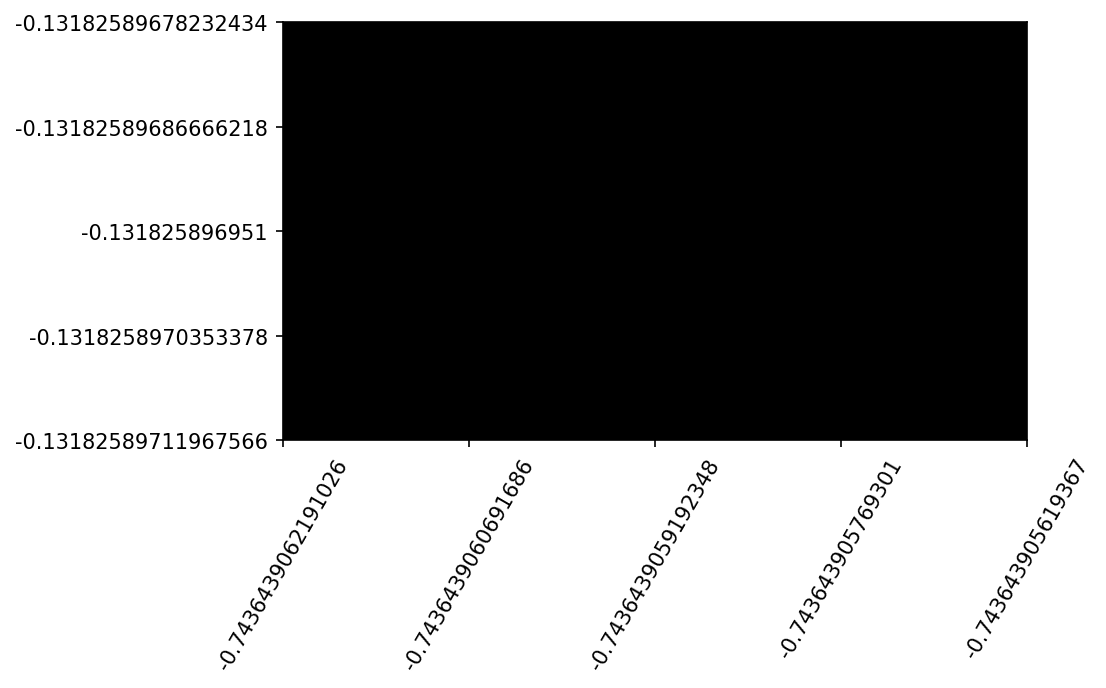

In [7]:
target = (62407000, -0.743643900055, -0.131825890901)
target = (10004407000, -0.7436439059192348, -0.131825896951)
x_target, y_target = manzoom.get_target_rans(target)
Fractal(x_ran=x_target, y_ran=y_target, threshold=500).plot(axis='on')

now we create an object from an initial frame and call the zoom method with the target

In [4]:
target = (62407000, -0.743643900055, -0.131825890901)
manzoom.zoom(n_frames=50, target=target, extension='mp4')

  0%|          | 0/50 [00:00<?, ?it/s]

ffmpeg -framerate 60 -i ./images/frames/frame%d.png -frames:v 50 -c:v libx265 -vtag hvc1 -filter:v "scale=in_color_matrix=auto:in_range=auto:out_color_matrix=bt709:out_range=tv" -pix_fmt:v "yuv420p" -colorspace:v "bt709" -color_primaries:v "bt709" -color_trc:v "bt709" -color_range:v "tv" -c:a copy -r 60 ./videos/zoom_\(62407000,-0,743643900055,-0,131825890901\)_5000thresh_360pts_50frames_60fps.mp4


ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/opt/homebrew/Cellar/ffmpeg/5.1.2 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --disable-indev=jack --enable-videotoolb

interesting target locations are:

In [4]:
target = (2, -0.59990625, -0.4290703125)
# target = (6e+4, -1.186592e+0, -1.901211e-1)
# target = (62407000, -0.743643900055, -0.131825890901)

Feel free to try these out by uncommenting and running the cell below

In [ ]:
Fractal().zoom(target=target)

If you have ffmpeg installed, you can compile a video by specifying a different extension, such as:

In [ ]:
Fractal().zoom(target=target, extension='mp4')

Saving a pdf:

In [38]:
Fractal(julia=True, x_ran=(-1.5,1.5), y_ran=(-1.875/2, 1.875/2), pallet_len=150, c_map='prism', n_pts=10000).save(extension='pdf')

Initialising object...
Object initialised.


## Julia Set

### examples

### Spin Animation

In [2]:
julS = Fractal(julia=True)

Object initialised, call plot() method to plot image or save() method to save in images directory...


In [3]:
julS.spin(n_frames=600)

  0%|          | 0/600 [00:00<?, ?it/s]

Completed, video saved at 'videos/spin_(-0.79+0.15j)_600_frames.gif'


previously 6m32s - tdqm: 6m03s

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [ ]:
n_iters = 60
a_ran = np.linspace(0, 2*np.pi, n_iters)

for i in range(n_iters):
    a = a_ran[i]
    jul = Fractal(mode='julia', c=0.7885*np.exp(1j*a), x_ran=(-1.5,1.5), y_ran=(-1.5,1.5), n_pts=1000)
    jul.plot(save=True, filename=f'spin/image{i}', c_map='prism', dpi=600)

In [22]:
# Build GIF
with imageio.get_writer('images/julia_spin2.gif', mode='I') as writer:
    for filename in [f'images/spin/image{i}.png' for i in range(n_iters)]:
        image = imageio.imread(filename)
        writer.append_data(image)

/var/folders/3p/sfv68y0d48x7855k_3bdlj8w0000gn/T/ipykernel_38579/4206869640.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


<img src="assets/julia_spin2.gif" width="500">
<img src="images/julia_spin4.gif" width="500">